<div class="text_cell_render border-box-sizing rendered_html">
<h2>Stroke Prediction</h2>

<h3>1) Introduction</h3>
<li>1.1. Importing Libraries</li>
<li>1.2. Importing Dataset</li>
<li>1.3. Missing Values</li>

<h3>2) Data Visualization</h3>
<li>2.1. Corr Heat Map</li>
<li>2.2. Count Plot</li>
<li>2.3. Distibution Plot</li>
<li>2.4. Scatter Plot</li>
<li>2.5. Violin Plot</li>
<li>2.6. Pair Plot</li>
    
<h3>3) Data Preprocessing</h3>
<li>3.1. Label Encoder</li>
<li>3.2. X and Y Splitting</li>
<li>3.3. Column Transformator and OneHotEncoder</li>
<li>3.4. Train Test Split</li>
<li>3.5. Smote</li>

<h3>4) Model Selection</h3>
<h3>5) Model Tuning</h3>
</div>

## 1) Introduction
#### 1.1 Importing Libraries

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics._plot.roc_curve import roc_curve as plot_roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#### 1.2 Importing Dataset

In [47]:
df = pd.read_csv('../datasets/full_checkup/stroke-dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### 1.3 Missing Values

In [49]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

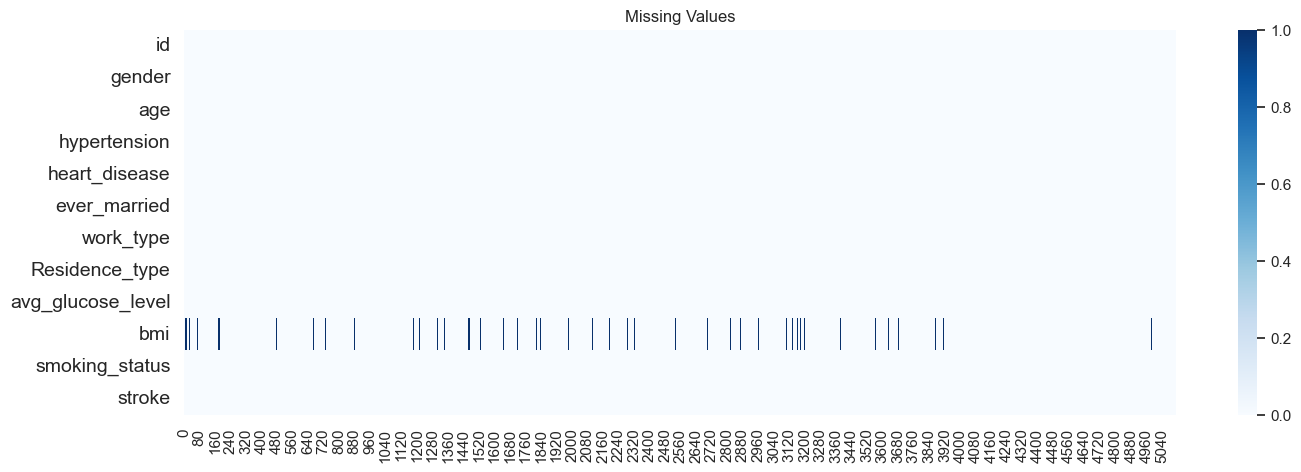

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues', ax=ax)
ax.set_title('Missing Values')

# Mengubah ukuran font pada sumbu y
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)  # Menggunakan label1, bukan label

plt.show()


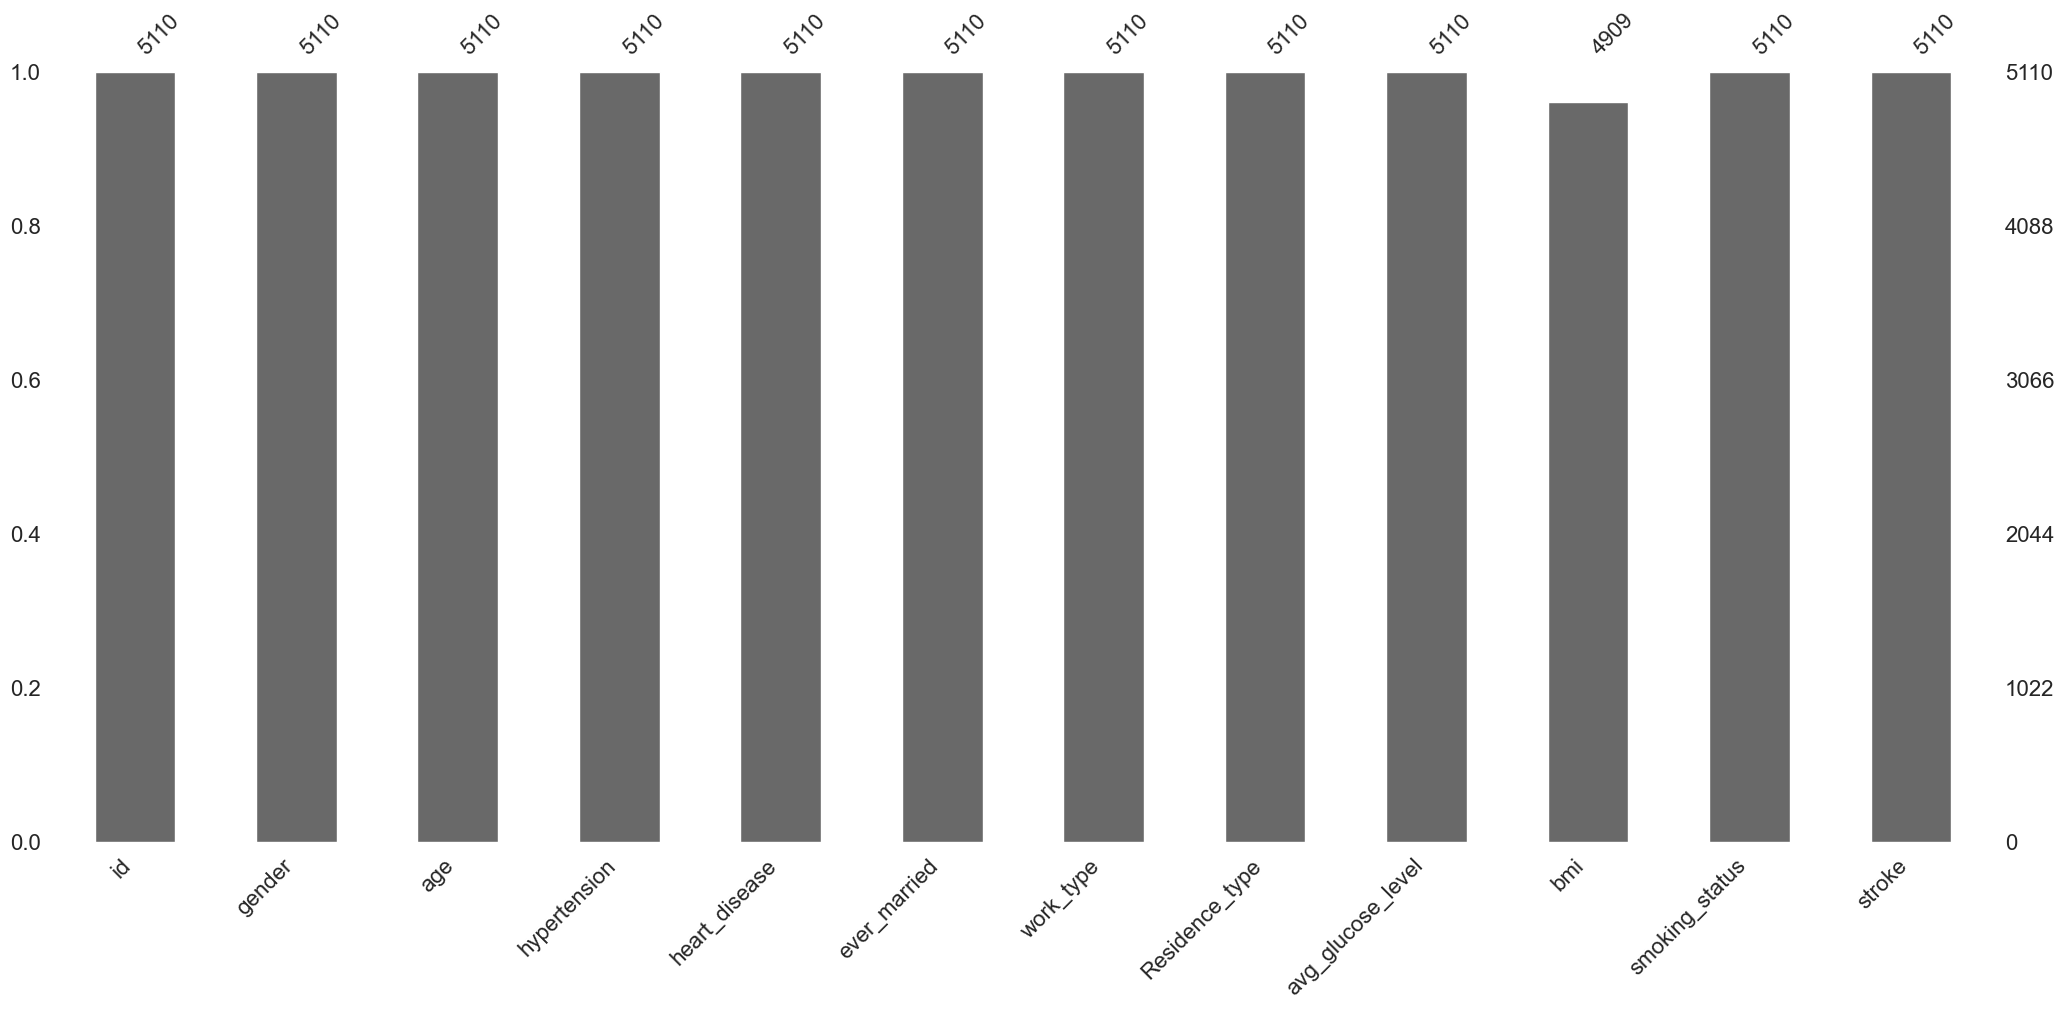

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

*We fill the missing values in the Body Mass Index variable with the average value.*

In [ ]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 2. Data Visualization

####  2.1 Corr Heat Map [](http://)

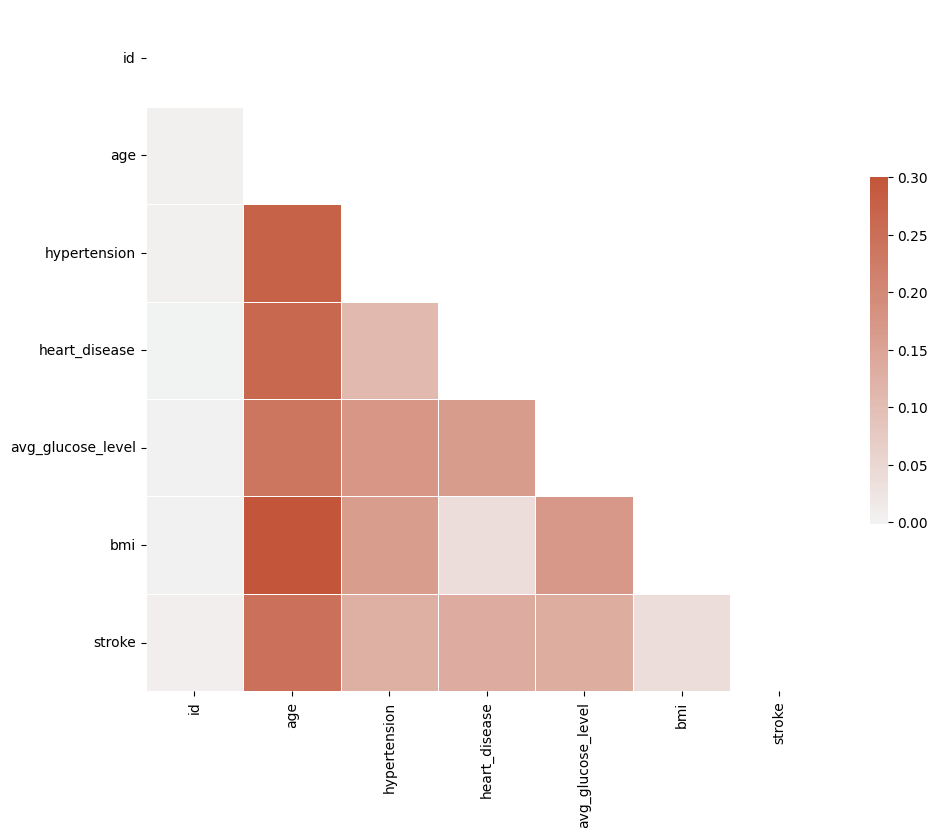

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Pilih hanya kolom numerik dari DataFrame
df_numeric = df.select_dtypes(include=[np.number])

# Hitung matriks korelasi hanya untuk kolom numerik
corr = df_numeric.corr()

# Buat mask untuk segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Atur ukuran figure matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Buat colormap diverging yang khusus
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Gambar heatmap dengan mask dan rasio aspek yang benar
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Tampilkan plot
plt.show()


#### 2.2 Count Plot

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


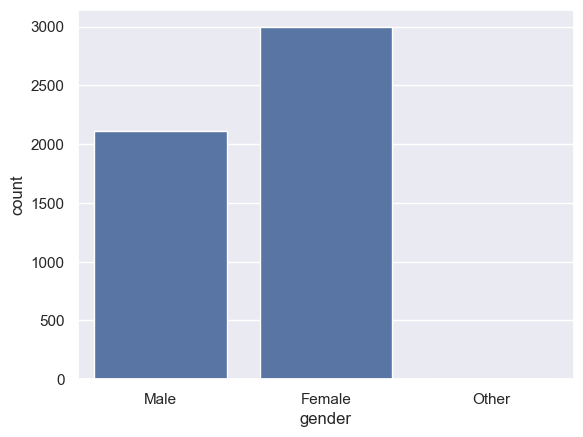

In [ ]:
print(df.gender.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='gender')

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


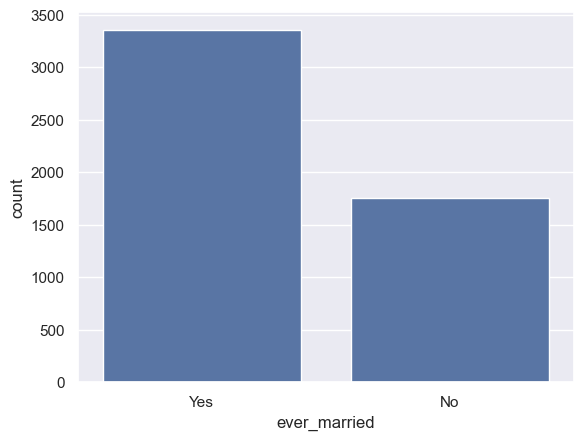

In [ ]:
print(df.ever_married.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='ever_married')

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


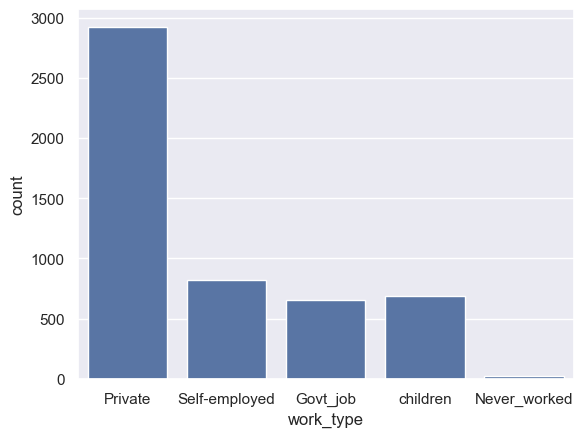

In [ ]:
print(df.work_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='work_type')

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


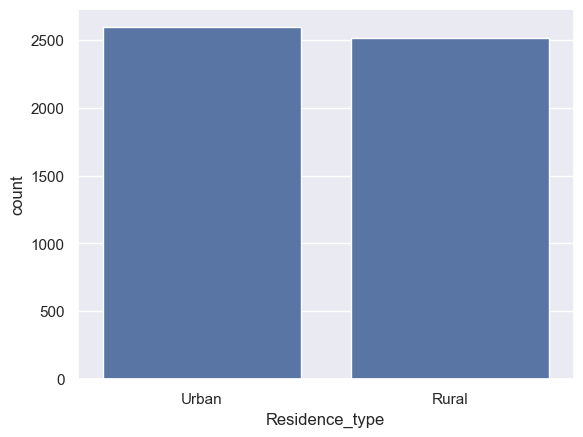

In [ ]:
print(df.Residence_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='Residence_type')

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


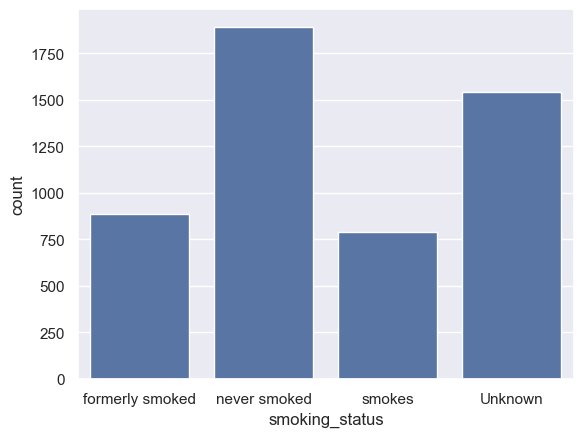

In [ ]:
print(df.smoking_status.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='smoking_status')

stroke
0    4861
1     249
Name: count, dtype: int64


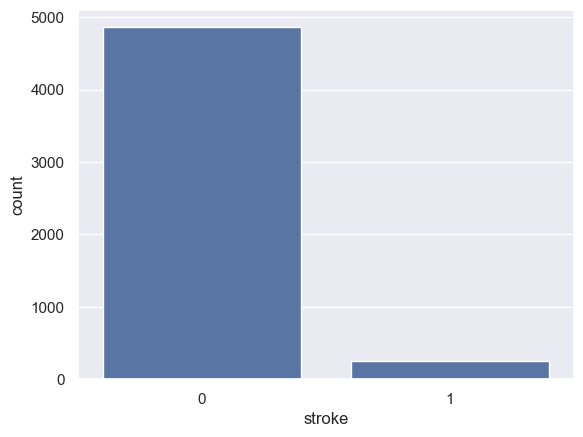

In [ ]:
print(df.stroke.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='stroke')

#### 2.3 Distribution Plot

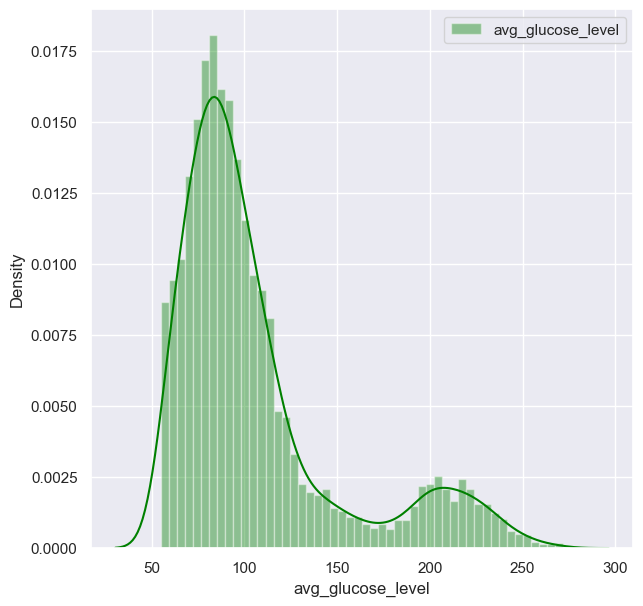

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.avg_glucose_level,color='green',label='avg_glucose_level',kde=True)
plt.legend()

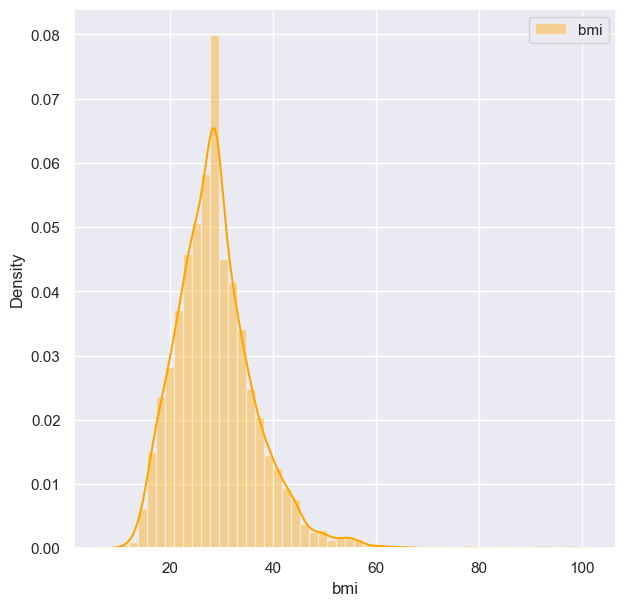

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi,color='orange',label='bmi',kde=True)
plt.legend()

(10.0, 100.0)

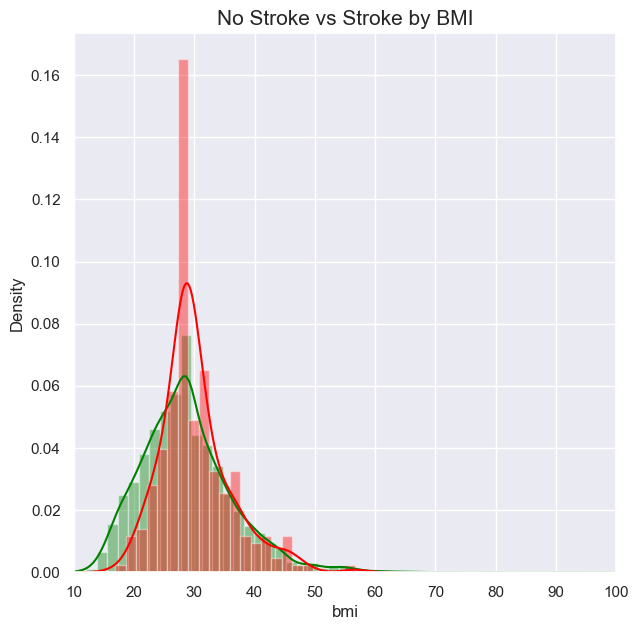

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['bmi'],color='green')
sns.distplot(df[df['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

(30.0, 330.0)

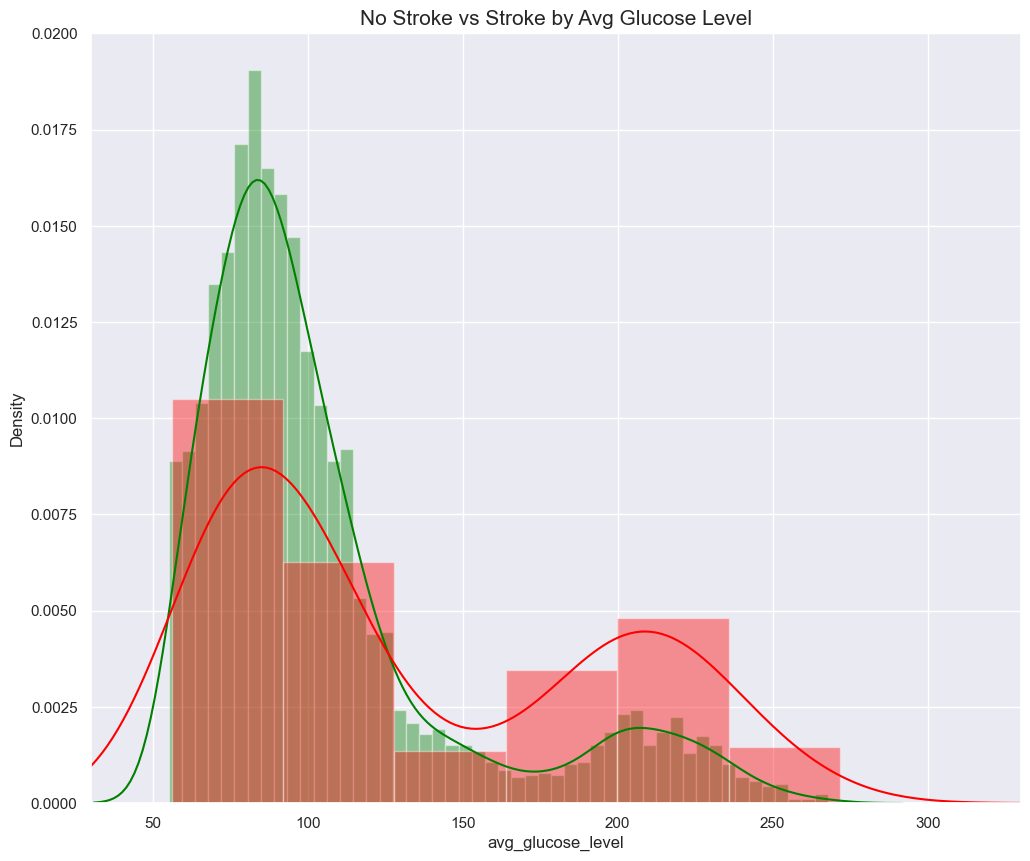

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(df[df['stroke'] == 1]['avg_glucose_level'],color='red')
plt.title('No Stroke vs Stroke by Avg Glucose Level',fontsize=15)
plt.xlim([30,330])

(18.0, 100.0)

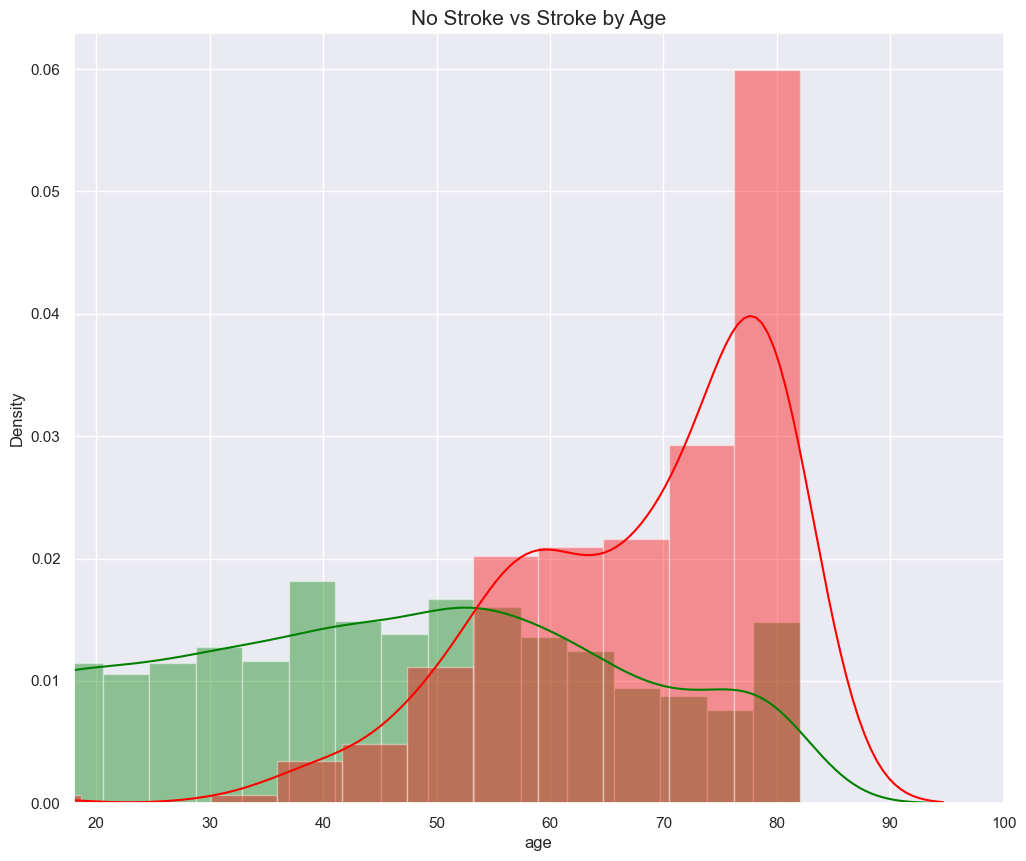

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['age'],color='green')
sns.distplot(df[df['stroke'] == 1]['age'],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

#### 2.4 Scatter Plot

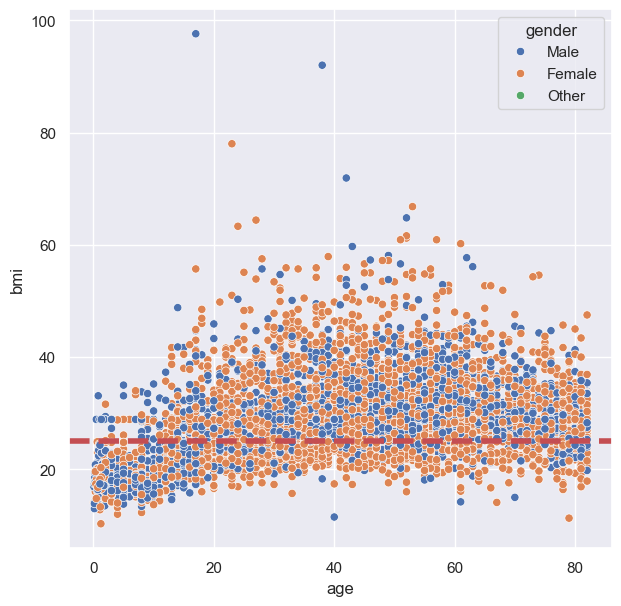

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='bmi',hue='gender')
graph.axhline(y=25, linewidth=4,color='r',linestyle= '--')

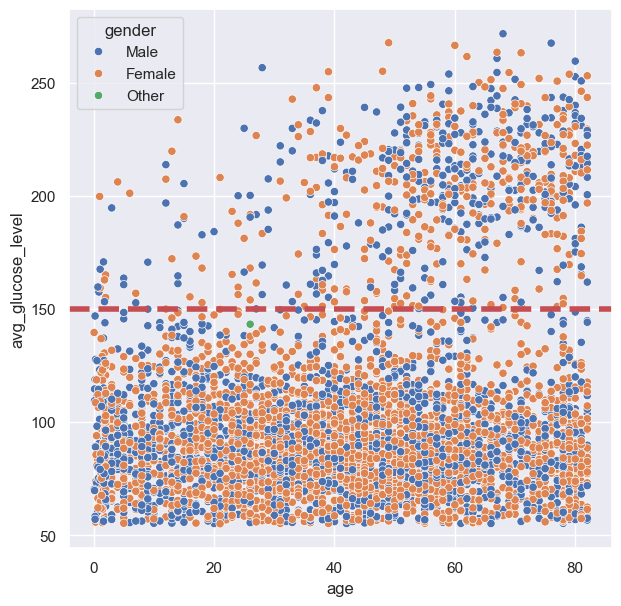

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='gender')
graph.axhline(y=150,linewidth=4,color='r',linestyle='--')

#### 2.5 Violin Plot

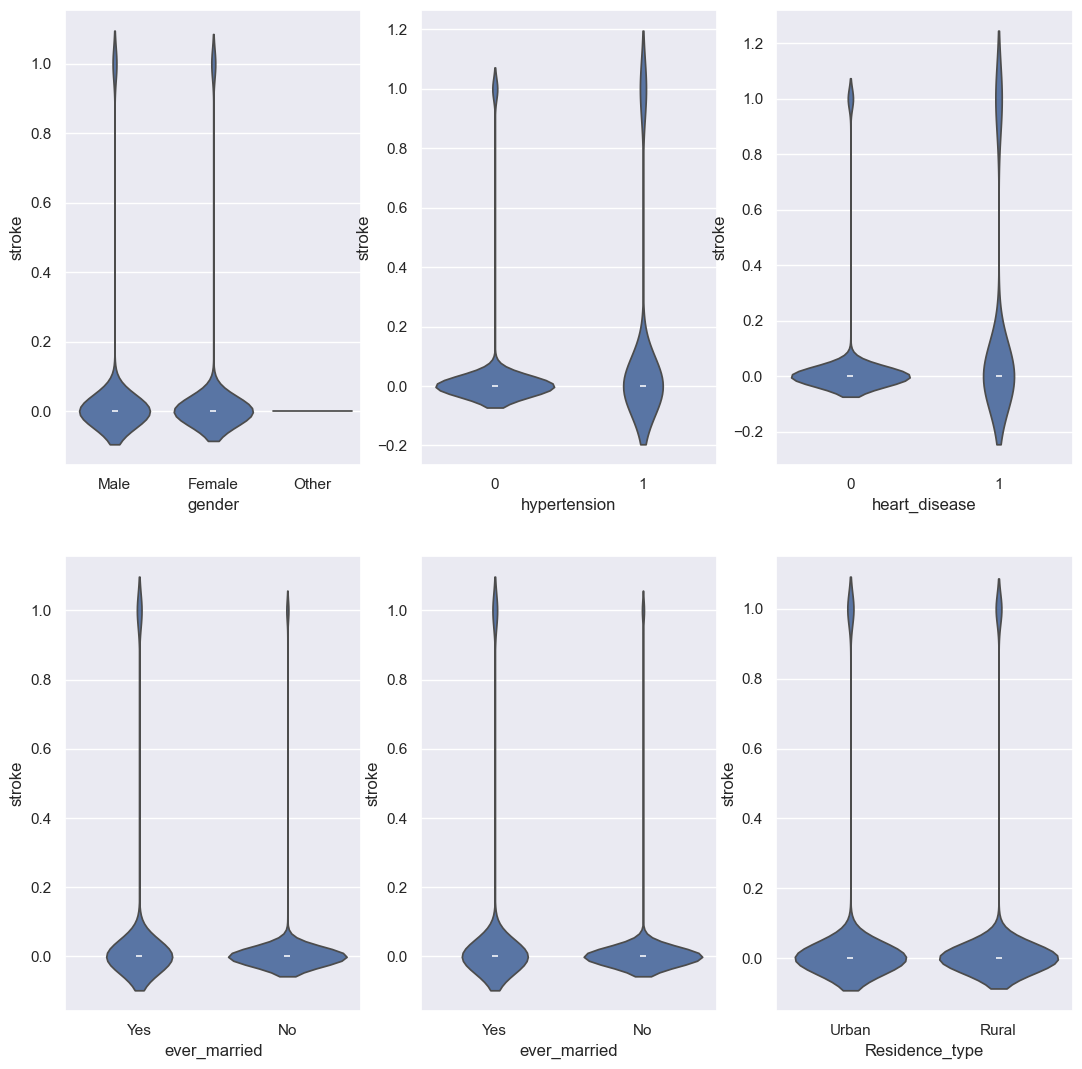

In [ ]:
plt.figure(figsize=(13,13))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.violinplot(x='gender',y='stroke',data=df)
plt.subplot(2,3,2)
sns.violinplot(x='hypertension',y='stroke',data=df)
plt.subplot(2,3,3)
sns.violinplot(x='heart_disease',y='stroke',data=df)
plt.subplot(2,3,4)
sns.violinplot(x='ever_married',y='stroke',data=df)
plt.subplot(2,3,5)
sns.violinplot(x='ever_married',y='stroke',data=df)
plt.subplot(2,3,6)
sns.violinplot(x='Residence_type',y='stroke',data=df)
plt.show()

#### 2.6 PairPlot

<Figure size 1000x1000 with 0 Axes>

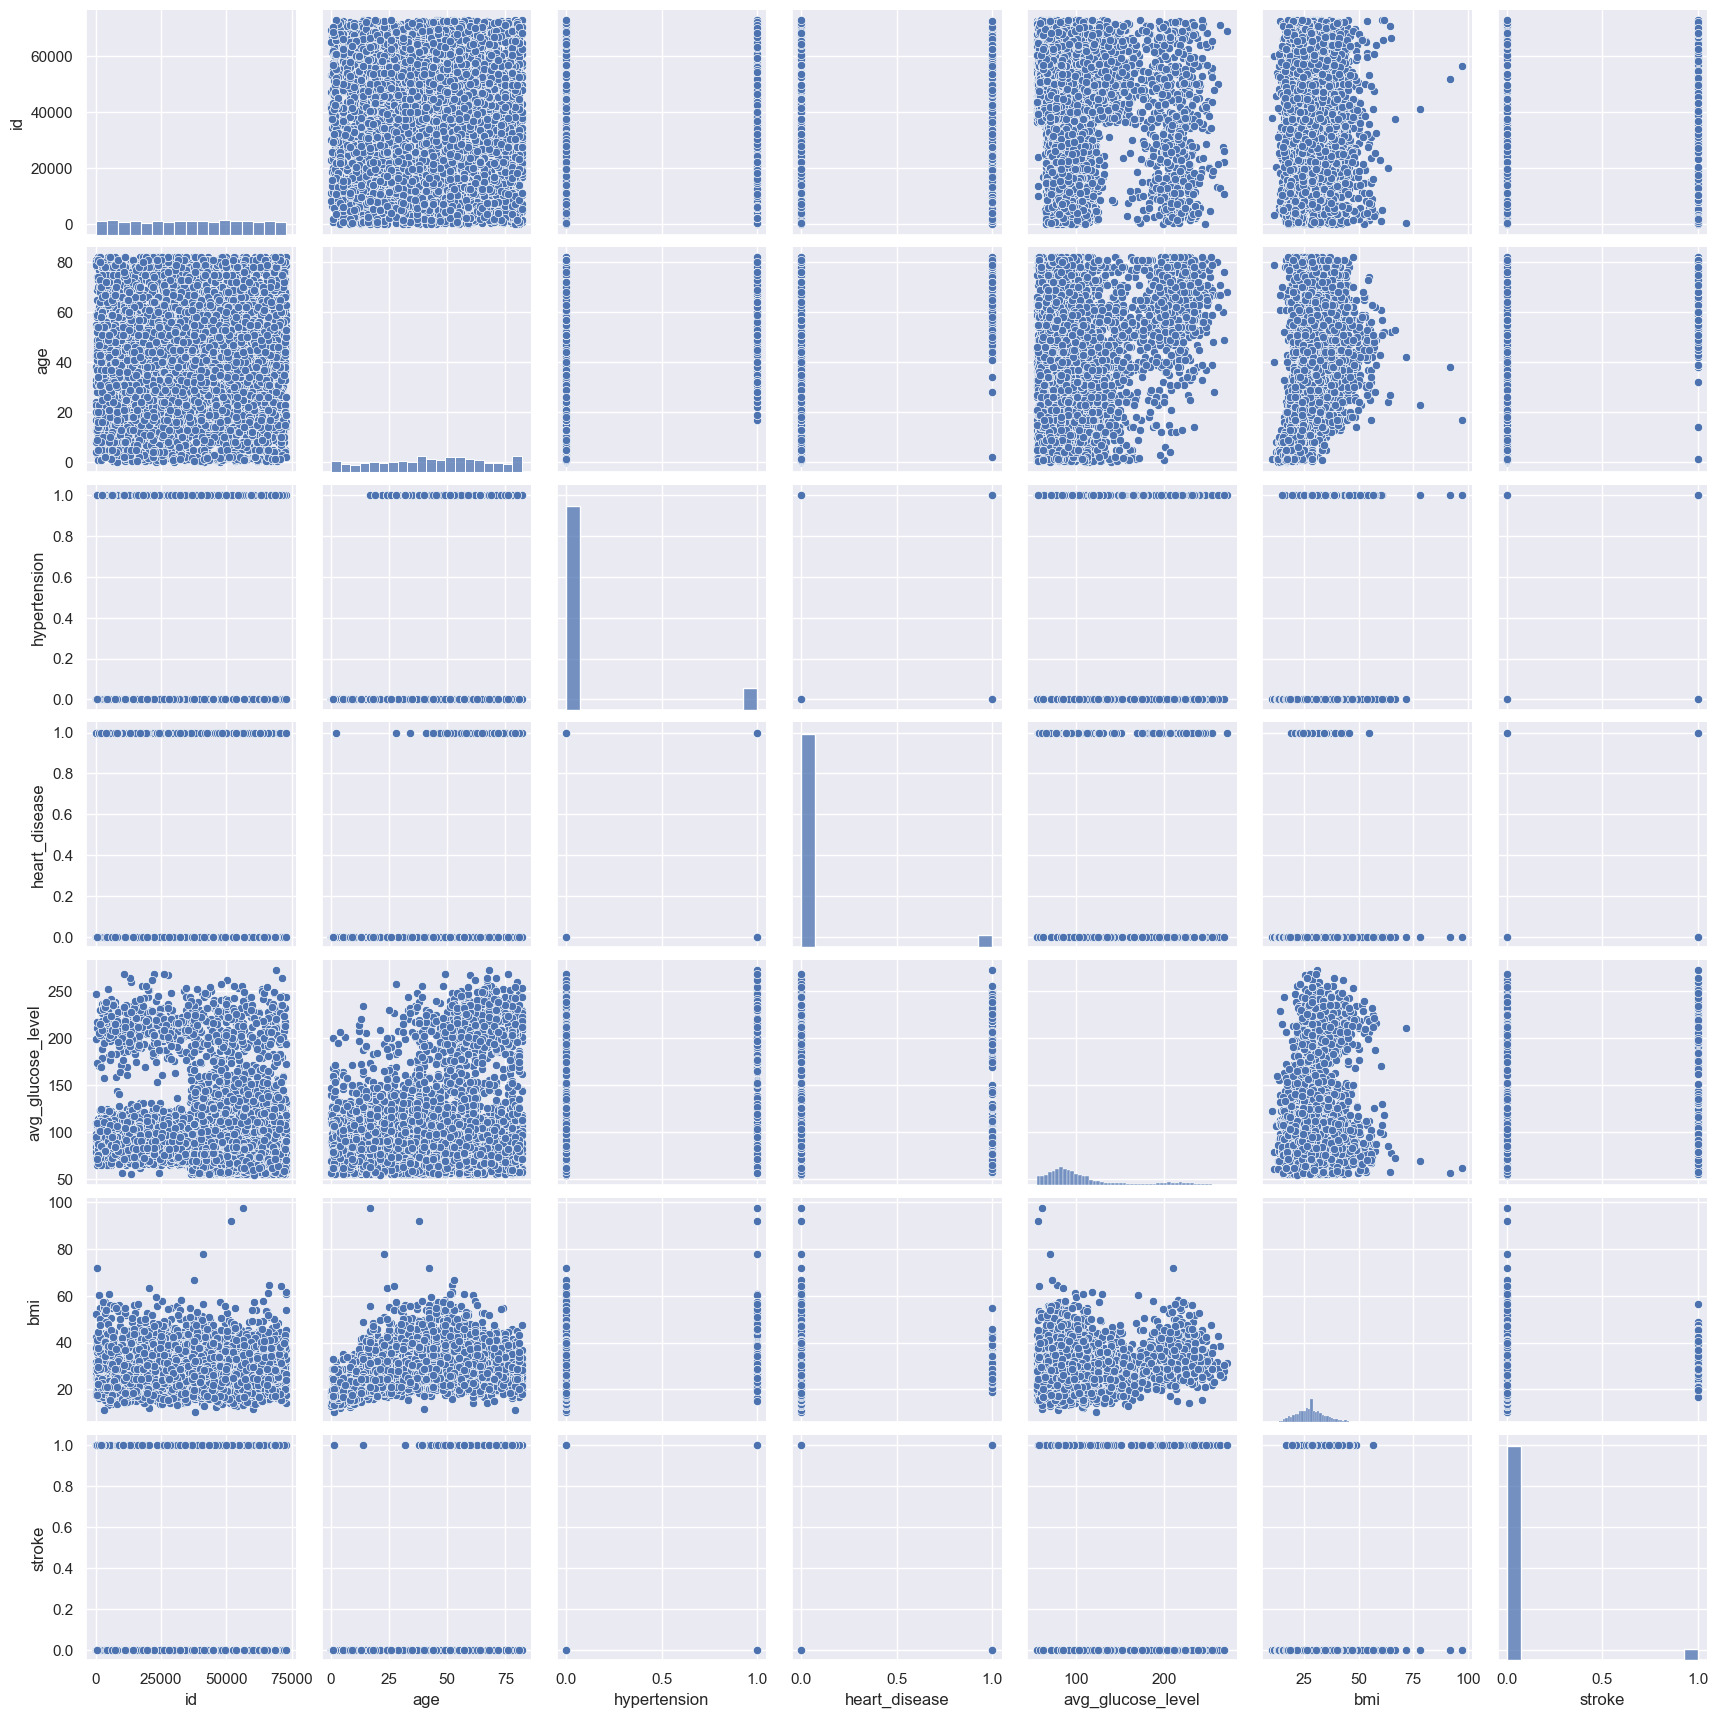

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

## 3. Data Preprocessing

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


#### 3.1 Label Encoder

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

#### 3.2 X and Y Splitting

In [ ]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


#### 3.3 Column Transformator and OneHotEncoder 

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

#### 3.4 Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (4088, 10)
Number transations x_test df (1022, 10)
Number transations y_train df (4088,)
Number transations y_test df (1022,)


#### 3.5 Smote

In [ ]:
# SMOTE 
# pip install imblearn
# from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 



In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7786, 10)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, counts of label 1: 3893
After OverSampling, counts of label 0: 3893


## 4. Model Selection

In [ ]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[962   6]
 [ 50   4]]
Accuracy Score:  0.9452054794520548

K-Fold Validation Mean Accuracy: 96.92 %

Standard Deviation: 6.98 %

ROC AUC Score: 0.53 %

Precision: 0.40 %

Recall: 0.07 %

F1 Score: 0.12 %
----------------------------------------

Logistic Regression :
[[753 215]
 [ 17  37]]
Accuracy Score:  0.7729941291585127

K-Fold Validation Mean Accuracy: 77.82 %

Standard Deviation: 2.18 %

ROC AUC Score: 0.73 %

Precision: 0.15 %

Recall: 0.69 %

F1 Score: 0.24 %
----------------------------------------

SVM :
[[693 275]
 [ 12  42]]
Accuracy Score:  0.7191780821917808

K-Fold Validation Mean Accuracy: 78.41 %

Standard Deviation: 1.81 %

ROC AUC Score: 0.75 %

Precision: 0.13 %

Recall: 0.78 %

F1 Score: 0.23 %
----------------------------------------

KNeigbors :
[[806 162]
 [ 27  27]]
Accuracy Score:  0.815068493150685

K-Fold Validation Mean Accuracy: 88.85 %

Standard Deviation: 1.23 %

ROC AUC Score: 0.67 %

Precision: 0.14 %

Recall: 0.50 %

F1 Score: 0.22 %

In [ ]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
7,RandomForest,94.520548,97.124189,6.877979,0.507710,0.250000,0.018519,0.034483
0,XGBClassifier,94.520548,96.918682,6.978975,0.533938,0.400000,0.074074,0.125000
8,AdaBoostClassifier,92.759295,95.197686,6.754115,0.550869,0.205882,0.129630,0.159091
6,DecisionTree,91.682975,94.619494,5.280244,0.571415,0.196078,0.185185,0.190476
5,BernoulliNB,82.191781,80.889331,3.668290,0.634967,0.132184,0.425926,0.201754
3,KNeigbors,81.506849,88.851405,1.230157,0.666322,0.142857,0.500000,0.222222
1,Logistic Regression,77.299413,77.818639,2.183430,0.731539,0.146825,0.685185,0.241830
4,GaussianNB,74.853229,78.808059,1.953939,0.736111,0.138790,0.722222,0.232836
2,SVM,71.917808,78.409800,1.806194,0.746843,0.132492,0.777778,0.226415


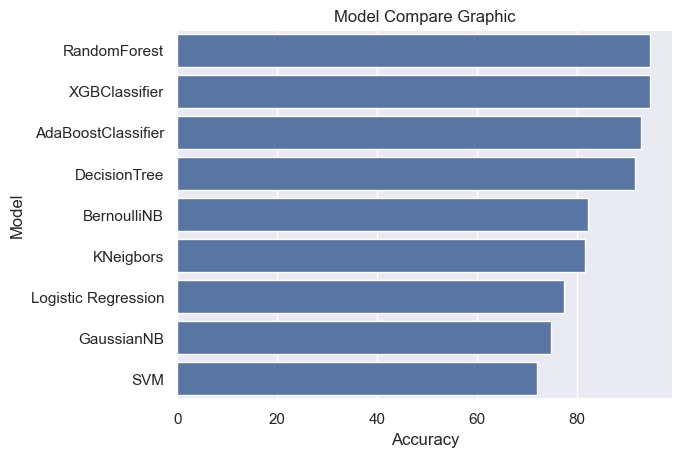

In [ ]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');

## 5. Model Tuning

In [ ]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res,y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print('-'*25)
    print('')

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
 Best Accuracy: 96.92 %

-------------------------

 KNeighborsClassifier(): 
 Best Accuracy: 90.01 %

-------------------------

 DecisionTreeClassifier(): 
 Best Accuracy: 95.00 %

-------------------------

 RandomForestClassifier(): 
 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.40      0.07      0.12        54

    accuracy                           0.95      1022
   macro avg       0.68      0.53      0.55      1022
weighted avg       0.92      0.95      0.93      1022

ROC AUC score: 0.8046372819100093
Accuracy Score:  0.9452054794520548


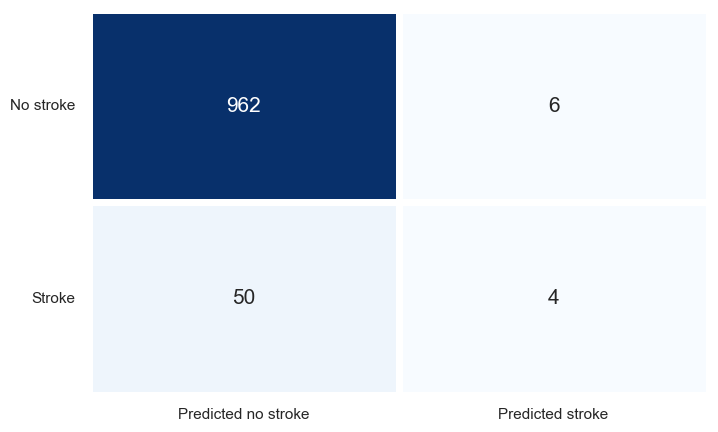

Text(0.5, 0, 'False Positive Rate')

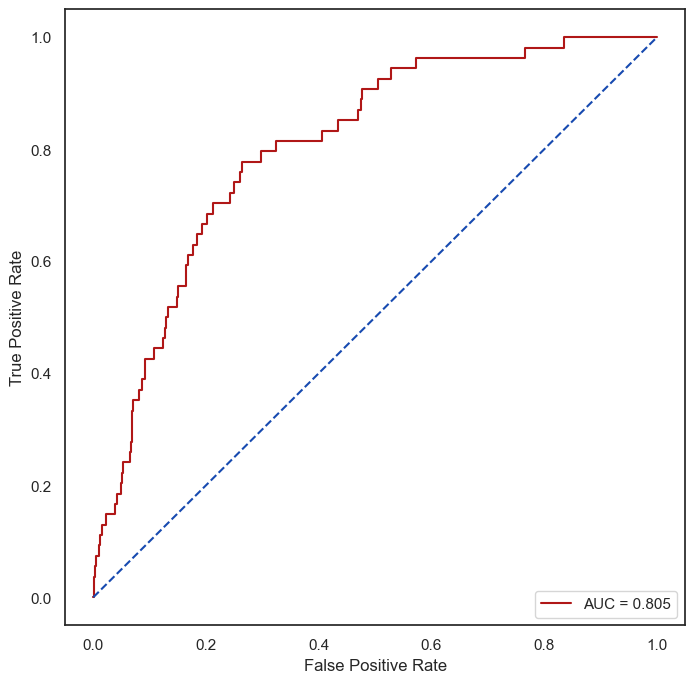

In [ ]:
from sklearn.metrics import classification_report

classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


***Dump Model***

In [ ]:
import joblib
# Menyimpan model ke file joblib
joblib.dump(classifier, '../../models/stroke_model.joblib')


['../../models/stroke_model.joblib']

In [ ]:
np.save('../../models/stroke_models/class/le_gender_classes.npy', le_gender.classes_)
np.save('../../models/stroke_models/class/le_ever_married_classes.npy', le_ever_married.classes_)
np.save('../../models/stroke_models/class/le_work_type_classes.npy', le_work_type.classes_)
np.save('../../models/stroke_models/class/le_residence_type_classes.npy', le_residence_type.classes_)
np.save('../../models/stroke_models/class/le_smoking_status_classes.npy', le_smoking_status.classes_)